In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [3]:
df = pd.read_csv("df_one_hot.csv")
df.head()

,Model Yıl,Km,Fiyat,Motor Degisimi,Yakıt Turu_Benzin/LPG,Yakıt Turu_Dizel,Yakıt Turu_Elektrik,Yakıt Turu_Hibrit,Vites_Otomatik Vites,Vites_Yarı Otomatik Vites,CCM_1301-1600 cc,CCM_1601-1800 cc,CCM_1801-2000 cc,CCM_2001-2500 cc,CCM_2501-3000 cc,CCM_3001-3500 cc,CCM_3501-4000 cc,CCM_4001-4500 cc,CCM_4501-5000 cc,CCM_5001-5500 cc,CCM_5501-6000 cc,CCM_6001 cc ve üzeri,Renk_Amarant,Renk_Bal Rengi,Renk_Bej,Renk_Beyaz,Renk_Bordo,Renk_Diğer,Renk_Eflatun,Renk_Füme,Renk_Gri,Renk_Gümüş,Renk_Gümüş Gri,Renk_Ihlamur,Renk_Kahverengi,Renk_Krem,Renk_Kum Rengi,Renk_Kırmızı,Renk_Lacivert,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil,Renk_Zeytin Gri,Renk_Şampanya,Kasa Tipi_Camlı Van,Kasa Tipi_Crossover,Kasa Tipi_Diğer,Kasa Tipi_Hatchback 3 Kapı,Kasa Tipi_Hatchback 5 Kapı,Kasa Tipi_MPV,Kasa Tipi_Minivan,Kasa Tipi_Roadster,Kasa Tipi_Sedan,Kasa Tipi_Spor / Coupe,Kasa Tipi_Station Wagon,Kasa Tipi_Üstü Açık / Cabriolet,Kimden_Sahibinden,Kimden_Yetkili,Durum_2. El,Durum_Hasarlı,Durum_Klasik,Marka_Audi,Marka_BMW,Marka_Chery,Marka_Chevrolet,Marka_Chrysler,Marka_Citroen,Marka_Dacia,Marka_Fiat,Marka_Ford,Marka_Geely,Marka_Honda,Marka_Hyundai,Marka_Infiniti,Marka_Isuzu,Marka_Jaguar,Marka_Jeep,Marka_Kia,Marka_Lada,Marka_Land Rover,Marka_Maserati,Marka_Mazda,Marka_Mercedes,Marka_Mini,Marka_Mitsubishi,Marka_Nissan,Marka_Opel,Marka_Peugeot,Marka_Porsche,Marka_Renault,Marka_Rover,Marka_Seat,Marka_Skoda,Marka_Tofaş,Marka_Volkswagen,Arac Tip Grubu_100 Serisi,Arac Tip Grubu_106,Arac Tip Grubu_11,Arac Tip Grubu_1100,Arac Tip Grubu_113,Arac Tip Grubu_12,Arac Tip Grubu_1201,Arac Tip Grubu_1310,Arac Tip Grubu_14,Arac Tip Grubu_145,Arac Tip Grubu_147,Arac Tip Grubu_156,Arac Tip Grubu_159,Arac Tip Grubu_16,Arac Tip Grubu_17,Arac Tip Grubu_180,Arac Tip Grubu_180 SLC,Arac Tip Grubu_19,Arac Tip Grubu_190,Arac Tip Grubu_2 Serisi,Arac Tip Grubu_200,Arac Tip Grubu_200 D,Arac Tip Grubu_200 E,Arac Tip Grubu_2008,Arac Tip Grubu_206,Arac Tip Grubu_206 + (Plus),Arac Tip Grubu_207,Arac Tip Grubu_208,Arac Tip Grubu_21,Arac Tip Grubu_214,Arac Tip Grubu_216,Arac Tip Grubu_220,Arac Tip Grubu_230,Arac Tip Grubu_230 E,Arac Tip Grubu_240 D,Arac Tip Grubu_250 D,Arac Tip Grubu_250 E,Arac Tip Grubu_280 E,Arac Tip Grubu_2CV,Arac Tip Grubu_3,Arac Tip Grubu_3 Serisi,Arac Tip Grubu_30,Arac Tip Grubu_300,Arac Tip Grubu_300 C,Arac Tip Grubu_300 D,Arac Tip Grubu_300 M,Arac Tip Grubu_300 SEL,Arac Tip Grubu_3008,Arac Tip Grubu_301,Arac Tip Grubu_306,Arac Tip Grubu_307,Arac Tip Grubu_308,Arac Tip Grubu_320,Arac Tip Grubu_323,Arac Tip Grubu_4 Serisi,Arac Tip Grubu_400,Arac Tip Grubu_4007,Arac Tip Grubu_406,Arac Tip Grubu_407,Arac Tip Grubu_45,Arac Tip Grubu_5,Arac Tip Grubu_5 Serisi,Arac Tip Grubu_500,Arac Tip Grubu_500 Ailesi,Arac Tip Grubu_500 X,Arac Tip Grubu_5008,Arac Tip Grubu_500L,Arac Tip Grubu_508,Arac Tip Grubu_6 Serisi,Arac Tip Grubu_605,Arac Tip Grubu_607,Arac Tip Grubu_626,Arac Tip Grubu_7 Serisi,Arac Tip Grubu_718,Arac Tip Grubu_9,Arac Tip Grubu_911,Arac Tip Grubu_A,Arac Tip Grubu_A Serisi,Arac Tip Grubu_A3,Arac Tip Grubu_A4,Arac Tip Grubu_A5,Arac Tip Grubu_A6,Arac Tip Grubu_A7,Arac Tip Grubu_A8,Arac Tip Grubu_AMG GT,Arac Tip Grubu_Accent,Arac Tip Grubu_Accent Blue,Arac Tip Grubu_Accent Era,Arac Tip Grubu_Accord,Arac Tip Grubu_Adam,Arac Tip Grubu_Agila,Arac Tip Grubu_Albea,Arac Tip Grubu_Alhambra,Arac Tip Grubu_Almera,Arac Tip Grubu_Altea,Arac Tip Grubu_Antara,Arac Tip Grubu_Arona,Arac Tip Grubu_Astra,Arac Tip Grubu_Ateca,Arac Tip Grubu_Atos,Arac Tip Grubu_Avalanche,Arac Tip Grubu_Aveo,Arac Tip Grubu_B,Arac Tip Grubu_B Serisi,Arac Tip Grubu_B-Max,Arac Tip Grubu_Blazer,Arac Tip Grubu_Brava,Arac Tip Grubu_Bravo,Arac Tip Grubu_Broadway,Arac Tip Grubu_C,Arac Tip Grubu_C-Elysee,Arac Tip Grubu_C-Max,Arac Tip Grubu_C1,Arac Tip Grubu_C2,Arac Tip Grubu_C3,Arac Tip Grubu_C3 Picasso,Arac Tip Grubu_C4,Arac Tip Grubu_C4 Cactus,Arac Tip Grubu_C4 Grand Picasso,Arac Tip Grubu_C4 Picasso,Arac Tip Grubu_C5,Arac Tip Grubu_C5 AirCross,Arac Tip Grubu_CJ-5,Arac Tip Grubu

In [4]:
df.shape

(8942, 480)

In [5]:
y = df["Fiyat"]
X = df.drop(["Fiyat"], axis = 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=42)

# Models
GB = GradientBoostingRegressor(random_state=17)
XG = XGBRegressor(use_label_encoder = False)
LG = LGBMRegressor(max_depth = 5)

In [12]:
# Gradient Boosting Model
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score : " , r2_score(y_test, y_pred))

83670.87161674626
r2_score :  0.8550990461233414


In [13]:
# XGBoost
XG.fit(X_train, y_train)
y_pred = XG.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score : " , r2_score(y_test, y_pred))

86033.01991951393
r2_score :  0.8468020360004003


In [17]:
# LGBM
LG.fit(X_train, y_train)
y_pred = LG.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score : " , r2_score(y_test, y_pred))
mean_absolute_error(y_test, y_pred)

76598.23815832623
r2_score :  0.8785604304558456


27955.629519130896

In [18]:
y_pred = LG.predict(X_train)
print("r2_score : " , r2_score(y_train, y_pred))
mean_absolute_error(y_train, y_pred)

r2_score :  0.9266045184771295


23954.480428683903

In [63]:
GB.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [6]:
gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8, 10],
              "n_estimators": [100, 500, 1000],
              "subsample": [1, 0.5, 0.7]}

In [7]:
gbm_best_grid = GridSearchCV(GB, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [8]:
gbm_best_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1}

In [9]:
gbm_final = GB.set_params(**gbm_best_grid.best_params_, random_state=17 ).fit(X, y)

In [10]:
cv_results = cross_validate(gbm_final, X, y, cv=5, scoring="r2")
cv_results['test_score'].mean()

0.7354155909576385

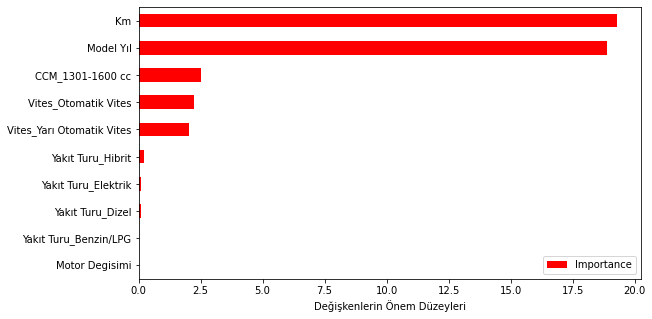

In [16]:
Importance = pd.DataFrame({"Importance": gbm_final.feature_importances_[:10]*100},
                         index = df.drop(["Fiyat"], axis = 1).columns[:10])

Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind= "barh",
                                                                          color = "r", figsize=(9,5))
plt.xlabel("Değişkenlerin Önem Düzeyleri")
plt.legend(loc='lower right');